# Seaborn

* http://seaborn.pydata.org/examples/index.html

### Instalar o Seaborn: 
Caso o Seaborn não esteja instalado, abra o prompt de comando ou terminal e digite: pip install seaborn

In [28]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import seaborn as sea

In [30]:
# Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

In [31]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Regressão linear 

O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados

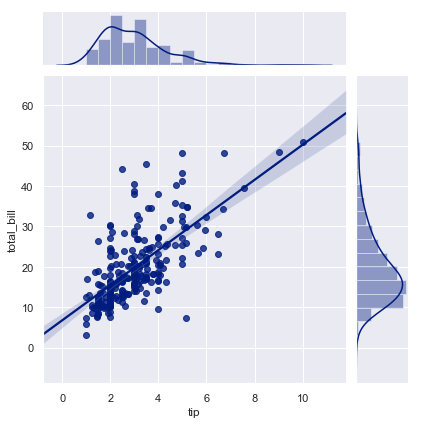

In [32]:
sea.jointplot("tip","total_bill", dados, kind = 'reg');

O método lmplot() cria plot com dados e modelos de regressão.

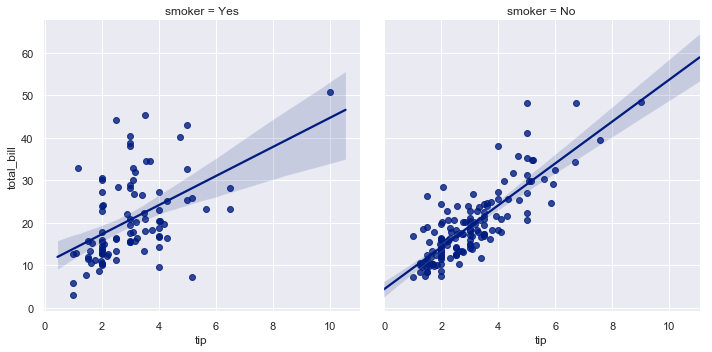

In [33]:
sea.lmplot("tip","total_bill", dados, col = "smoker");

Construindo um dataframe com Pandas

In [34]:
df = pd.DataFrame()

Alimentando o Dataframe com valores aleatórios

In [35]:
df['a'] = random.sample(range(1, 100), 25)
df['b'] = random.sample(range(1, 100), 25)

In [36]:
df.head()

,a,b
0,99,92
1,45,36
2,69,74
3,67,49
4,7,6


Scatter Plot

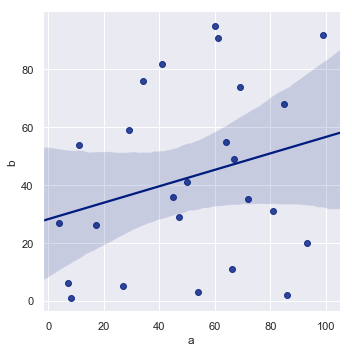

In [37]:
sea.lmplot('a', 'b', data = df, fit_reg = True);

Density Plot

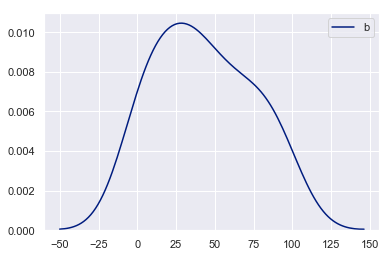

In [38]:
sea.kdeplot(df.b);

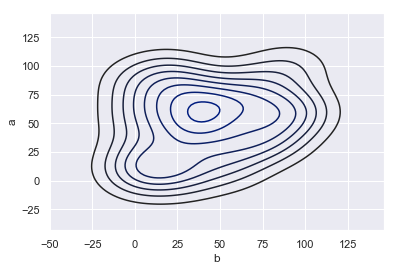

In [39]:
sea.kdeplot(df.b, df.a)

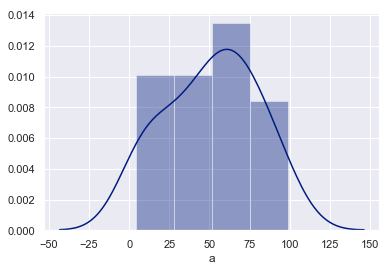

In [40]:
sea.distplot(df.a);

Histograma

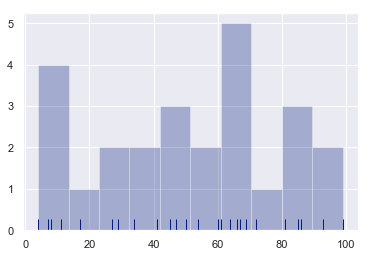

In [41]:
plt.hist(df.a, alpha = .3)
sea.rugplot(df.a);

Box Plot

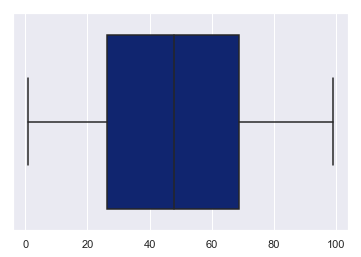

In [42]:
sea.boxplot([df.b, df.a]);

Violin Plot

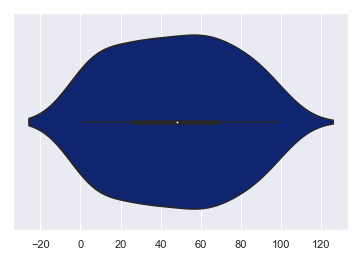

In [43]:
sea.violinplot([df.a, df.b]);

Heatmap

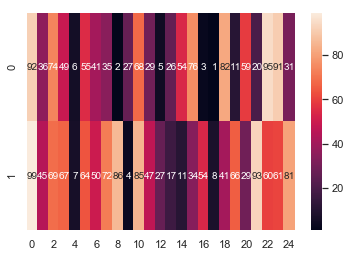

In [44]:
sea.heatmap([df.b, df.a], annot = True, fmt = "d");

Clustermap

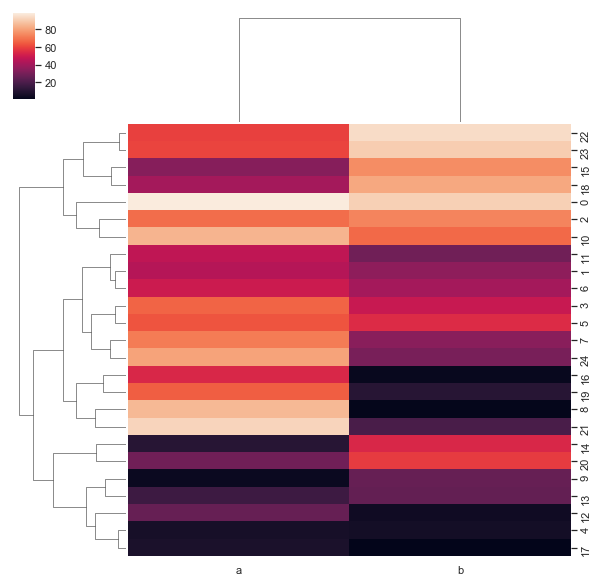

In [45]:
sea.clustermap(df);

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

### Temas

Configurações globais para controlar estilo, tamanho de fonte, cores, etc.

In [47]:
sea.set(context="notebook", style="darkgrid", palette="dark")

Seaborn possui opções de cores variadas

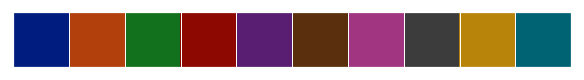

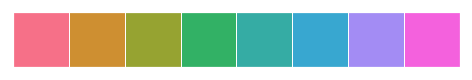

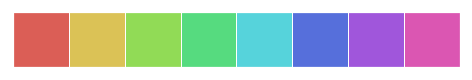

In [48]:
sea.palplot(sea.color_palette())
sea.palplot(sea.color_palette("husl", 8))
sea.palplot(sea.color_palette("hls", 8))

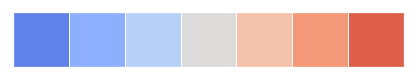

In [49]:
sea.palplot(sea.color_palette("coolwarm", 7))

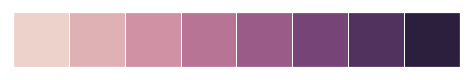

In [50]:
sea.palplot(sea.cubehelix_palette(8))

O método tsplot cria plots a partir de séries temporais

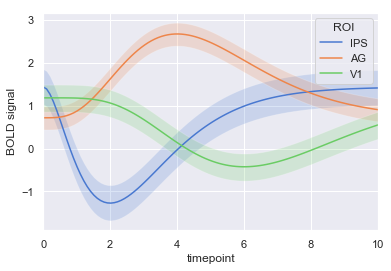

In [51]:
gammas = sea.load_dataset("gammas")
sea.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color = "muted");

### Outros Plots

Histogramas com subsets dos dados

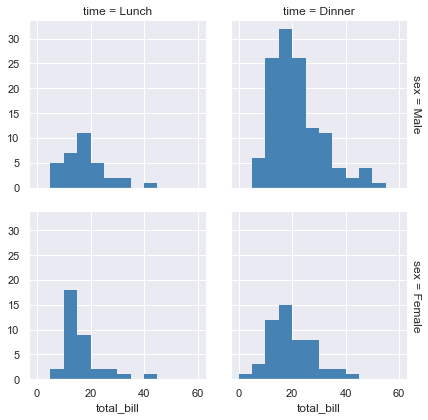

In [52]:
sea.set(style = "darkgrid")

dados = sea.load_dataset("tips")
g = sea.FacetGrid(dados, row = "sex", col = "time", margin_titles = True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color = "steelblue", bins = bins, lw = 0);

Diversos plots simultâneos

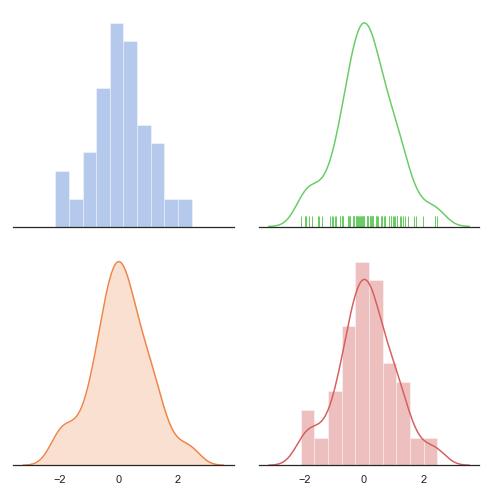

In [53]:
sea.set(style = "white", palette = "muted")
f, axes = plt.subplots(2, 2, figsize = (7, 7), sharex = True)
sea.despine(left = True)

rs = np.random.RandomState(10)

b, g, r, p = sea.color_palette("muted", 4)

d = rs.normal(size = 100)

sea.distplot(d, kde = False, color = b, ax = axes[0, 0])
sea.distplot(d, hist = False, rug = True, color = r, ax = axes[0, 1])
sea.distplot(d, hist = False, color = g, kde_kws = {"shade": True}, ax = axes[1, 0])
sea.distplot(d, color = p, ax = axes[1, 1])

plt.setp(axes, yticks = [])
plt.tight_layout()

Plot com distribuições marginais

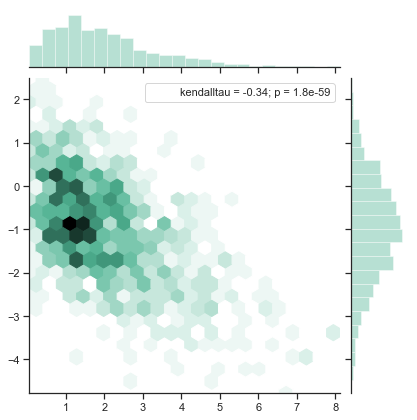

In [54]:
from scipy.stats import kendalltau
sea.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size = 1000)
y = -.5 * x + rs.normal(size = 1000)
sea.jointplot(x, y, kind = "hex", stat_func = kendalltau, color = "#4CB391");

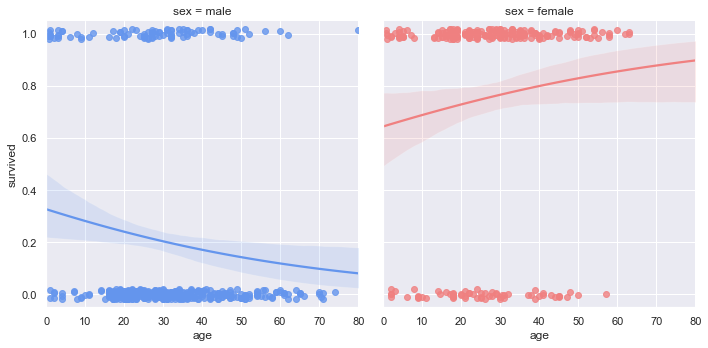

In [55]:
# Regressão Logística
sea.set(style = "darkgrid")
df = sea.load_dataset("titanic")

pal = dict(male = "#6495ED", female = "#F08080")
g = sea.lmplot("age", "survived", col = "sex", hue = "sex", data = df, palette = pal, 
               y_jitter = .02, logistic = True)
g.set(xlim=(0, 80), ylim = (-.05, 1.05));

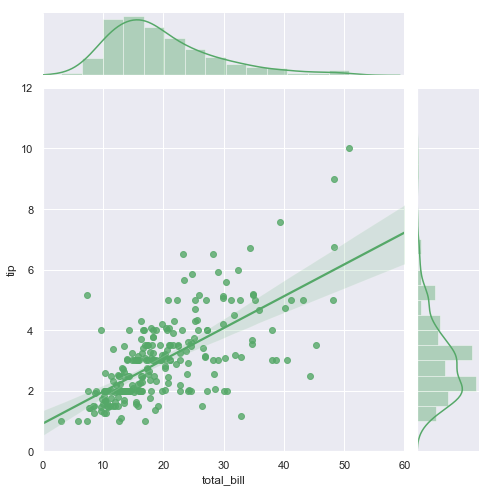

In [56]:
# Regressão Linear com Distribuições Marginais
sea.set(style = "darkgrid")
tips = sea.load_dataset("tips")
color = sea.color_palette()[2]
g = sea.jointplot("total_bill", "tip", data = tips, kind = "reg", xlim = (0, 60), 
                  ylim = (0, 12), color = color, size = 7);

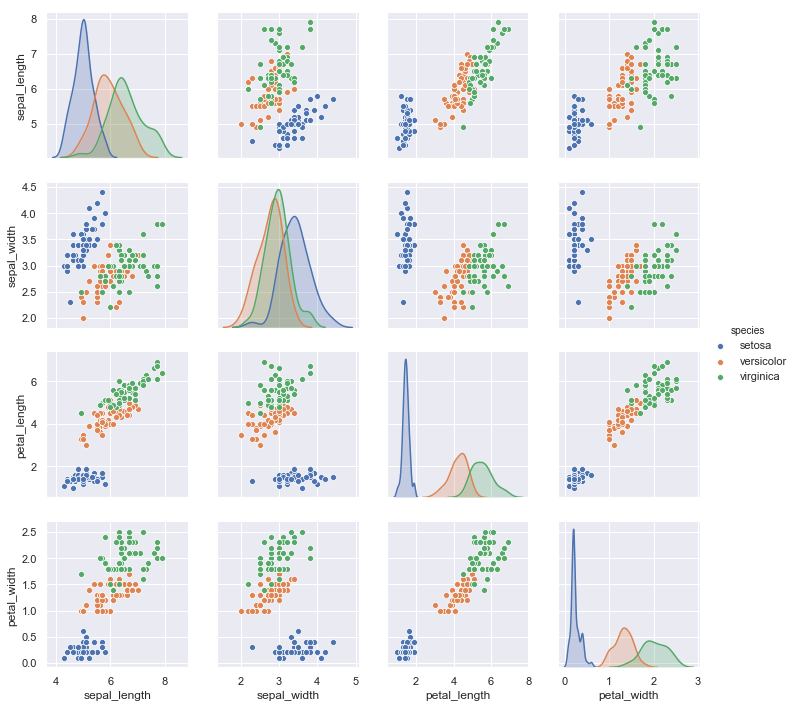

In [57]:
# Pair Plots
sea.set(style = "darkgrid")
df = sea.load_dataset("iris")
sea.pairplot(df, hue = "species", size = 2.5);